In [2]:
import pandas  as pd
import numpy   as np
from matplotlib import pyplot as plt
from scipy.special import factorial 


In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head(10)

,"u,кГц",А. div,Volts/Div,"А, В"
0,4.1230,0.3,0.5,0.15
1,4.1240,0.4,0.5,0.20
2,4.1250,0.4,0.5,0.20
3,4.1260,0.6,0.5,0.30
4,4.1270,0.8,0.5,0.40
5,4.1280,1.1,0.5,0.55
6,4.1285,1.4,0.5,0.70
7,4.1287,1.5,0.5,0.75
8,4.1289,1.6,0.5,0.80
9,4.1290,1.9,0.5,0.00


In [7]:
y, x = data['А. div'] * data['Volts/Div'], data['u,кГц']

In [8]:
def puasson(mean, value):
    return (mean ** value) * np.exp(-mean) / factorial(value)

In [9]:
def get_dispersion(values):
    t = values - values.mean()
    t *= t
    return (t.sum() / t.shape[0])**0.5

def normal(values, dispersion = None, mean = None):
    if dispersion == None:
        dispersion = get_dispersion(values)
    if mean       == None:
        mean       = values.mean()
        
    return (1 / ( 2 * np.pi * dispersion) * np.exp(-0.5 * (((values - mean) / dispersion) ** 2)))

In [10]:
print(get_dispersion(y))

0.36784257464603276


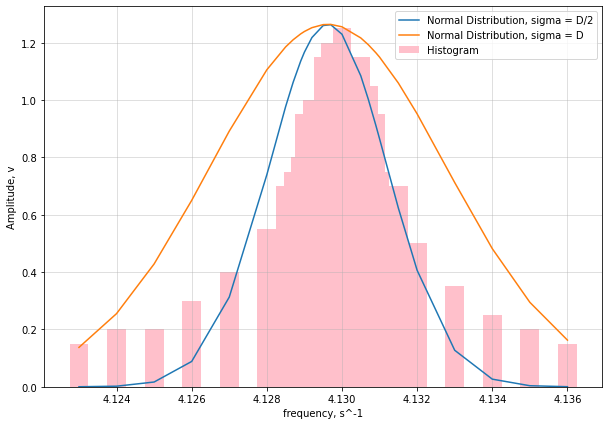

In [11]:
plt.figure(figsize = (10, 7))
plt.bar(x, height=y, width=[0.0005], color = 'pink', label = 'Histogram')
#erorrbar1 = plt.errorbar(x, y, label = 'Plot of Histogram', xerr = 0.0005, yerr = 0.050, color = 'r', fmt=' ')
#erorrbar1[-1][0].set_linestyle(':')
plt.plot(x, normal(x, get_dispersion(x) /2)/80, label = 'Normal Distribution, sigma = D/2')
plt.plot(x, normal(x)/40, label = 'Normal Distribution, sigma = D')

plt.grid(alpha = 0.5)
plt.legend()
plt.xlabel('frequency, s^-1')
plt.ylabel('Amplitude, v')
plt.show()

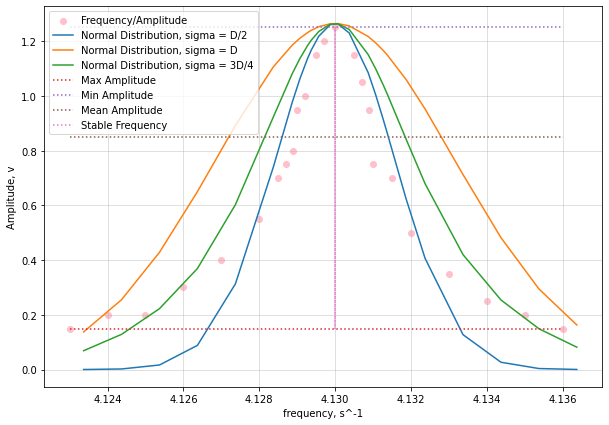

In [37]:
plt.figure(figsize = (10, 7))
plt.scatter(x, y, color = 'pink', label = 'Frequency/Amplitude')
#erorrbar1 = plt.errorbar(x, y, label = 'Plot of Histogram', xerr = 0.0005, yerr = 0.050, color = 'r', fmt=' ')
#erorrbar1[-1][0].set_linestyle(':')
plt.plot(x + (4.130 - x.mean()),  normal(x, get_dispersion(x) /2)/80, label = 'Normal Distribution, sigma = D/2')
plt.plot(x + (4.130 - x.mean()),  normal(x + (4.130 - x.mean()))/40, label = 'Normal Distribution, sigma = D')
plt.plot(x + (4.130 - x.mean()), (normal(x + (4.130 - x.mean()))/40 + normal(x, get_dispersion(x) /2)/80) / 2, label = 'Normal Distribution, sigma = 3D/4')
plt.plot(x, np.ones(x.shape[0])*y.min(), linestyle = ':', label = 'Max Amplitude')
plt.plot(x, np.ones(x.shape[0])*y.max(), linestyle = ':', label = 'Min Amplitude')
plt.plot(x, np.ones(x.shape[0])*(0.85), linestyle = ':', label = 'Mean Amplitude')
#plt.plot(np.ones(y.shape[0])*(x.max()+x.min()) / 2, y, linestyle = ':', label = 'Mean Frequency')
plt.plot(np.ones(y.shape[0])*(4.130), y, linestyle = ':', label = 'Stable Frequency')

plt.grid(alpha = 0.5)
plt.legend()
plt.xlabel('frequency, s^-1')
plt.ylabel('Amplitude, v')
plt.show()